In [189]:
import pandas as pd

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [190]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [191]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
display(google_play_reviews_df.head())

slimmed_reviews = google_play_reviews_df.dropna()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [192]:
google_play_df['Reviews'] = google_play_df['Reviews'].map(lambda x: x.replace('M', '00000').replace('.', "") )
google_play_df['Reviews'] = pd.to_numeric(google_play_df['Reviews'])


In [187]:
#google_play_df['Size'].unique()

# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [193]:
display(google_play_df.info())
google_play_df.isna().sum()
#for col in google_play_df.columns:
    #print(col, "\n", google_play_df[col].value_counts(normalize=True).head(), "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


None

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [194]:
categories = google_play_df['Category'].unique()
google_play_df = google_play_df[google_play_df['Category'] != '1.9']
#google_play_df['Category'].value_counts()

# Here is the code that we used to quadruple check our scatterplot

In [195]:
social = google_play_df.loc[google_play_df['Category'] == 'SOCIAL']
social['Reviews'].mean()

2105903.125423729

In [196]:
social['Rating'].mean()

4.255598455598457

In [197]:
productivity = google_play_df.loc[google_play_df['Category'] == 'PRODUCTIVITY']
productivity['Reviews'].mean()

269143.80896226416

In [198]:
import matplotlib.pyplot as plt

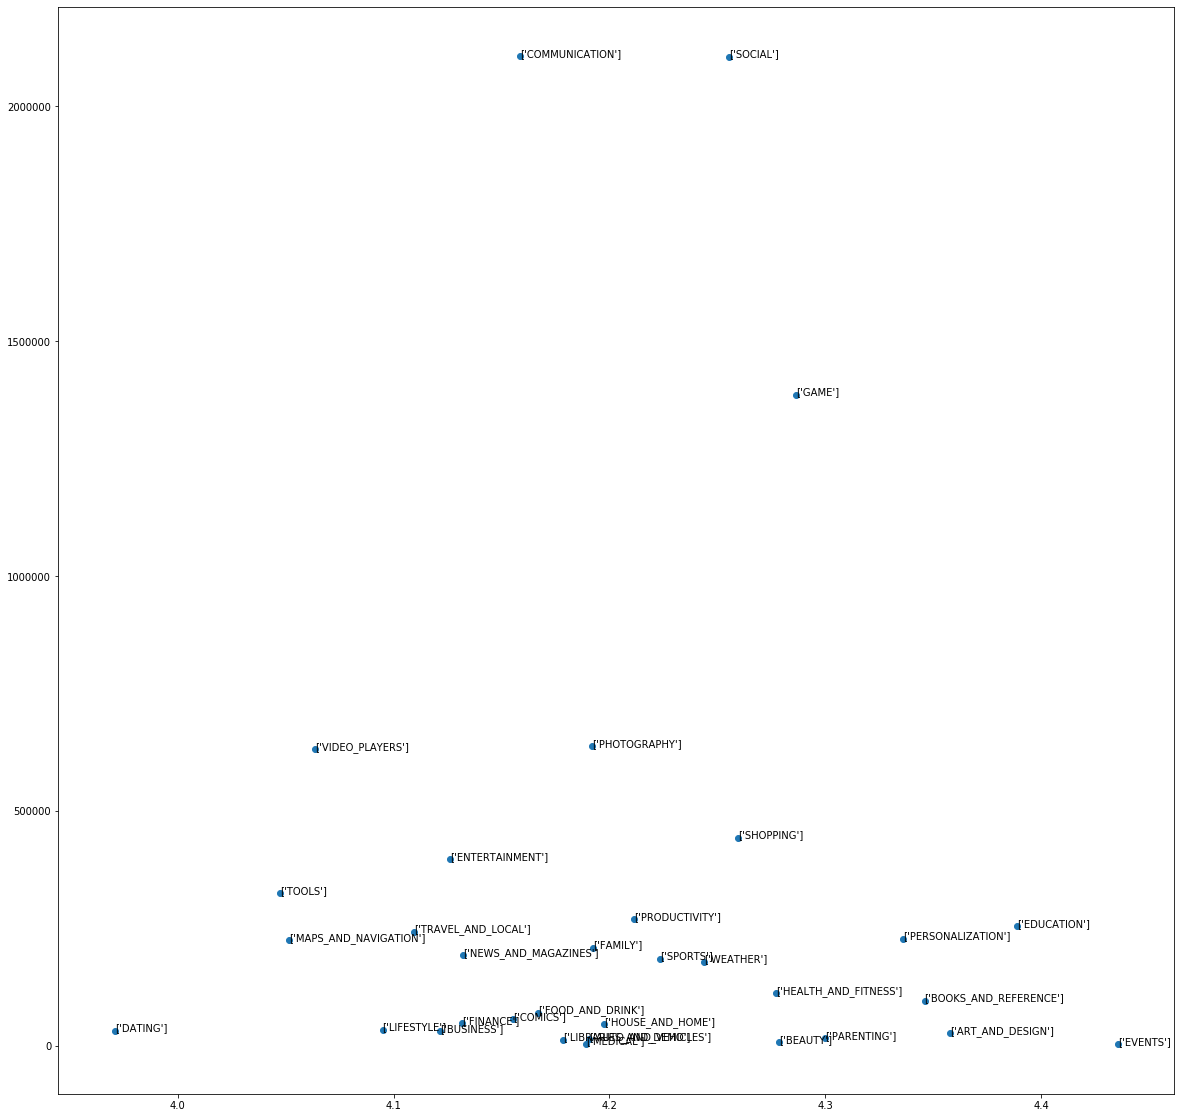

In [199]:
x = google_play_df.groupby('Category')['Rating'].mean()
y = google_play_df.groupby('Category')['Reviews'].mean()
labs = google_play_df.groupby('Category')['Category'].unique()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

for i, cat in enumerate(labs):
    ax.annotate(cat, (x[i], y[i]))
    
#print(x, y)
plt.show()

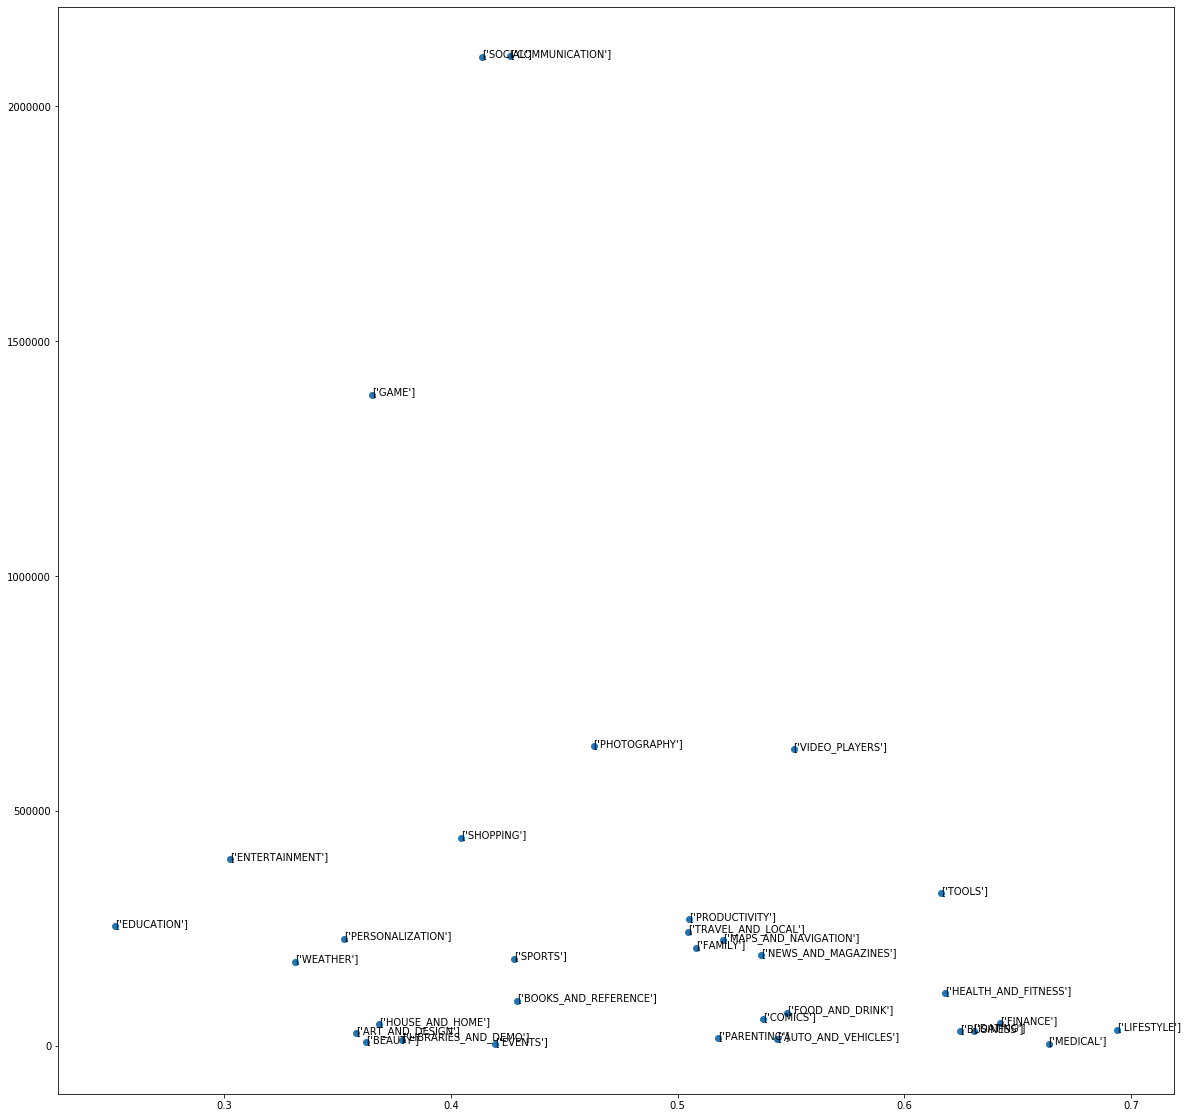

In [200]:
x = google_play_df.groupby('Category')['Rating'].std()
y = google_play_df.groupby('Category')['Reviews'].mean()
labs = google_play_df.groupby('Category')['Category'].unique()

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y)

for i, cat in enumerate(labs):
    ax.annotate(cat, (x[i], y[i]))
    
#print(x, y)
plt.show()

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

# We all collaborated on question 2 in Paysons notebook. Thought it would make the most sense to have all of the code in one place.

# For this next section, choose a Category of playstore apps

## Category Chosen: Social



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Me where I just gave up on Question 3 in order to have enough time to make the power point. But I figured I'd leave it here for you to see :)

In [201]:
art_and_design= google_play_df.loc[google_play_df['Category'] == 'ART_AND_DESIGN']
art_and_design
art_and_design.loc[:, "Genres"].unique()
#Genres = google_play_df[Genres].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure'],
      dtype=object)

In [202]:
Social = google_play_df.loc[google_play_df['Category'] == 'SOCIAL']
Social.loc[:, "Genres"].unique()


array(['Social'], dtype=object)

In [203]:
Social["Genres"].count()

295

# Question 4:
What is something interesting you found about your category? 

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

# Question 6:
Anything else we should know about this dataset?